In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/credit_scoring.csv')
df

,client_id,DIR,Age,NumLoans,NumRealEstateLoans,NumDependents,Num30-59Delinquencies,Num60-89Delinquencies,Income,BalanceToCreditLimit,Delinquent90
0,0,0.496289,49.1,13,0,0.0,2,0,5298.360639,0.387028,0
1,1,0.433567,48.0,9,2,2.0,1,0,6008.056256,0.234679,0
2,2,2206.731199,55.5,21,1,NaN,1,0,NaN,0.348227,0
3,3,886.132793,55.3,3,0,0.0,0,0,NaN,0.971930,0
4,4,0.000000,52.3,1,0,0.0,0,0,2504.613105,1.004350,0
...,...,...,...,...,...,...,...,...,...,...,...
74995,74995,0.169463,67.6,5,1,0.0,0,0,20129.654428,0.074689,0
74996,74996,2085.662215,43.2,1,1,0.0,0,0,NaN,1.005390,0
74997,74997,0.118935,23.0,4,0,0.0,2,0,2019.117329,0.384511,0
74998,74998,0.203414,46.3,14,2,0.0,0,0,16823.909642,0.524093,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   client_id              75000 non-null  int64  
 1   DIR                    75000 non-null  float64
 2   Age                    75000 non-null  float64
 3   NumLoans               75000 non-null  int64  
 4   NumRealEstateLoans     75000 non-null  int64  
 5   NumDependents          73084 non-null  float64
 6   Num30-59Delinquencies  75000 non-null  int64  
 7   Num60-89Delinquencies  75000 non-null  int64  
 8   Income                 60153 non-null  float64
 9   BalanceToCreditLimit   75000 non-null  float64
 10  Delinquent90           75000 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 6.3 MB


# **Анализ и предабработка**

## **Пропуски**

In [4]:
# Посмотрим на количество пропусков в каждом столбце
df.isna().sum()

# Также можно вывести процент пропусков:
df.isna().mean() * 100

,0
client_id,0.000000
DIR,0.000000
Age,0.000000
NumLoans,0.000000
NumRealEstateLoans,0.000000
NumDependents,2.554667
Num30-59Delinquencies,0.000000
Num60-89Delinquencies,0.000000
Income,19.796000
BalanceToCreditLimit,0.000000


In [5]:
# Удаляем столбец NumDependents так как пропусков меньше 5%
df = df.drop(columns=['NumDependents'])

# Заполняем пропуски в Income медианой
median_income = df['Income'].median()
df['Income'] = df['Income'].fillna(median_income)

# Проверим, что пропусков больше нет
df.isna().sum()

,0
client_id,0
DIR,0
Age,0
NumLoans,0
NumRealEstateLoans,0
Num30-59Delinquencies,0
Num60-89Delinquencies,0
Income,0
BalanceToCreditLimit,0
Delinquent90,0


## **Корреляция**

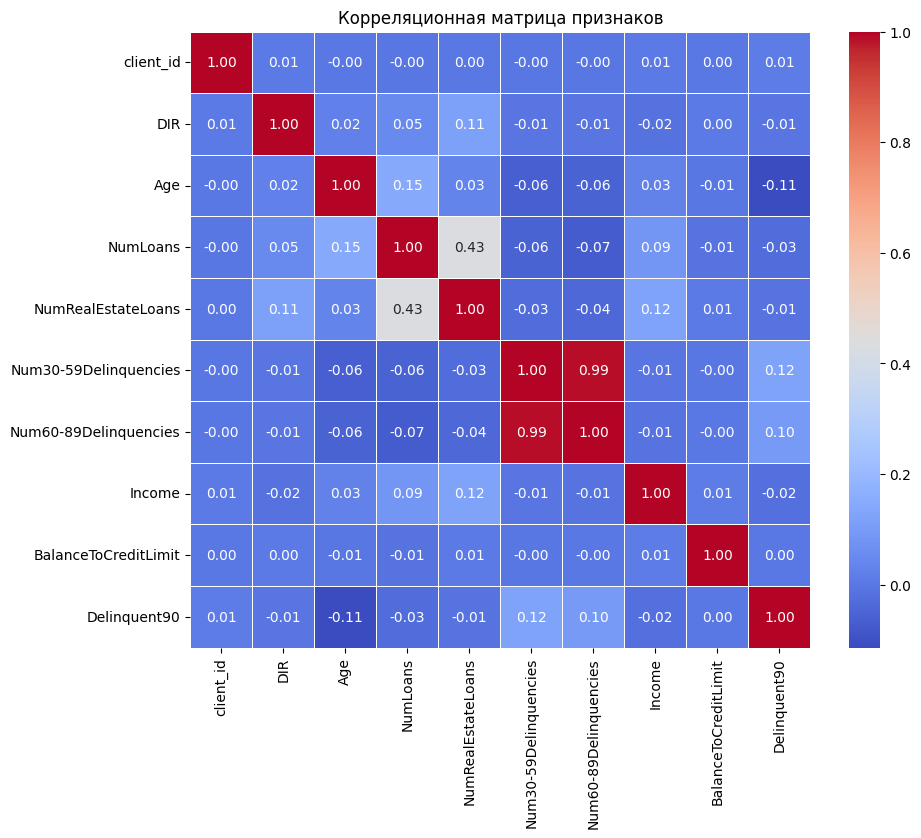

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Строим корреляционную матрицу
corr = df.corr(numeric_only=True)

# Визуализируем тепловую карту
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Корреляционная матрица признаков')
plt.show()

In [7]:
threshold = 0.8
corr_features = set()

# Вычисляем корреляцию только по числовым признакам, исключая target
corr_matrix = df.drop(columns=['Delinquent90']).corr()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            corr_features.add(colname)
            print(f"{corr_matrix.columns[j]} <-> {corr_matrix.columns[i]} | corr={corr_matrix.iloc[i, j]:.2f}")

print(f"\nУдаляемые признаки: {corr_features}")

# Удаляем сильно коррелирующие признаки
df = df.drop(columns=corr_features)

# Проверяем оставшиеся признаки
df.head()



Num30-59Delinquencies <-> Num60-89Delinquencies | corr=0.99

Удаляемые признаки: {'Num60-89Delinquencies'}


,client_id,DIR,Age,NumLoans,NumRealEstateLoans,Num30-59Delinquencies,Income,BalanceToCreditLimit,Delinquent90
0,0,0.496289,49.1,13,0,2,5298.360639,0.387028,0
1,1,0.433567,48.0,9,2,1,6008.056256,0.234679,0
2,2,2206.731199,55.5,21,1,1,5424.552473,0.348227,0
3,3,886.132793,55.3,3,0,0,5424.552473,0.971930,0
4,4,0.000000,52.3,1,0,0,2504.613105,1.004350,0


## **Выбросы**

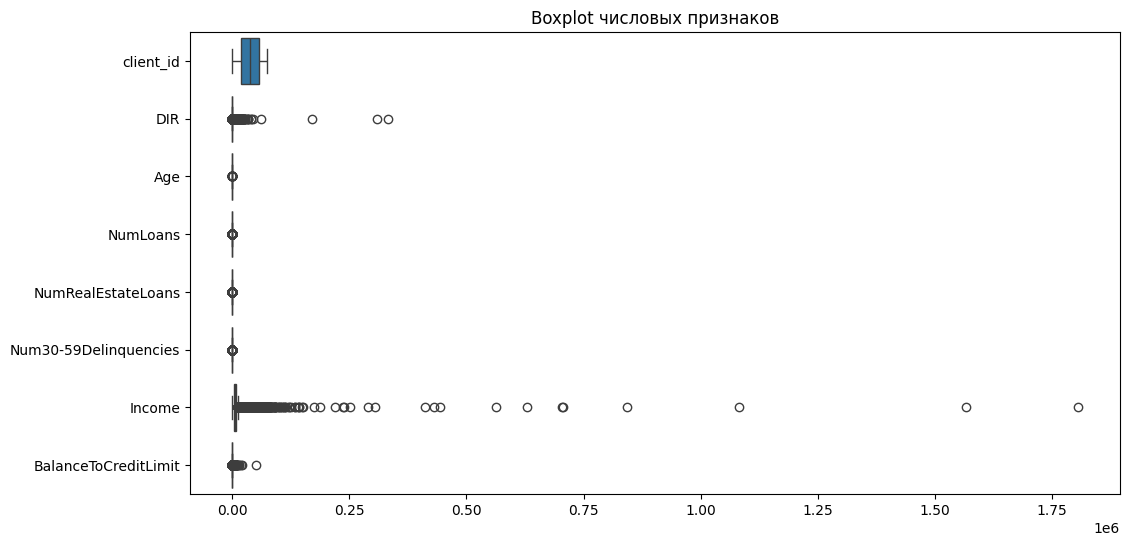

client_id: выбросов = 0
DIR: выбросов = 15608
Age: выбросов = 36
NumLoans: выбросов = 2000
NumRealEstateLoans: выбросов = 426
Num30-59Delinquencies: выбросов = 11988
Income: выбросов = 4781
BalanceToCreditLimit: выбросов = 398


In [8]:
# Числовые признаки (кроме target)
num_cols = df.drop(columns=['Delinquent90']).columns

# Boxplot для всех числовых признаков
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols], orient='h')
plt.title("Boxplot числовых признаков")
plt.show()

# Определим выбросы через IQR для каждого числового признака
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    n_outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    print(f"{col}: выбросов = {n_outliers}")

In [9]:
# Обрезка по 1-й и 99-й перцентили через clip
winsor_cols = ['DIR', 'NumLoans', 'NumRealEstateLoans', 'Num30-59Delinquencies', 'Income', 'BalanceToCreditLimit']

for col in winsor_cols:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = df[col].clip(lower, upper)

# Проверим оставшиеся выбросы через IQR
for col in winsor_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    n_out = ((df[col] < lower) | (df[col] > upper)).sum()
    print(f"{col}: выбросов после clip = {n_out}")



DIR: выбросов после clip = 15608
NumLoans: выбросов после clip = 2000
NumRealEstateLoans: выбросов после clip = 0
Num30-59Delinquencies: выбросов после clip = 11988
Income: выбросов после clip = 4781
BalanceToCreditLimit: выбросов после clip = 0


## **Скалирование и балансировка классов данных**

In [10]:
from sklearn.preprocessing import StandardScaler

# Выбираем признаки для скейлинга
features = df.drop(columns=['client_id', 'Delinquent90']).columns
scaler = StandardScaler()

# Масштабируем
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df_scaled[features])

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Отделяем признаки и таргет
X = df_scaled.drop(columns=['client_id', 'Delinquent90'])
y = df_scaled['Delinquent90']

# Разделяем на train и test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Балансировка классов на тренировочной выборке
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Распределение классов после SMOTE
import pandas as pd
print(pd.Series(y_train_bal).value_counts())


Delinquent90
0    55990
1    55990
Name: count, dtype: int64


**Разделение на обучающую и тестовую выьорки**

# **Дерево решений**

In [12]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

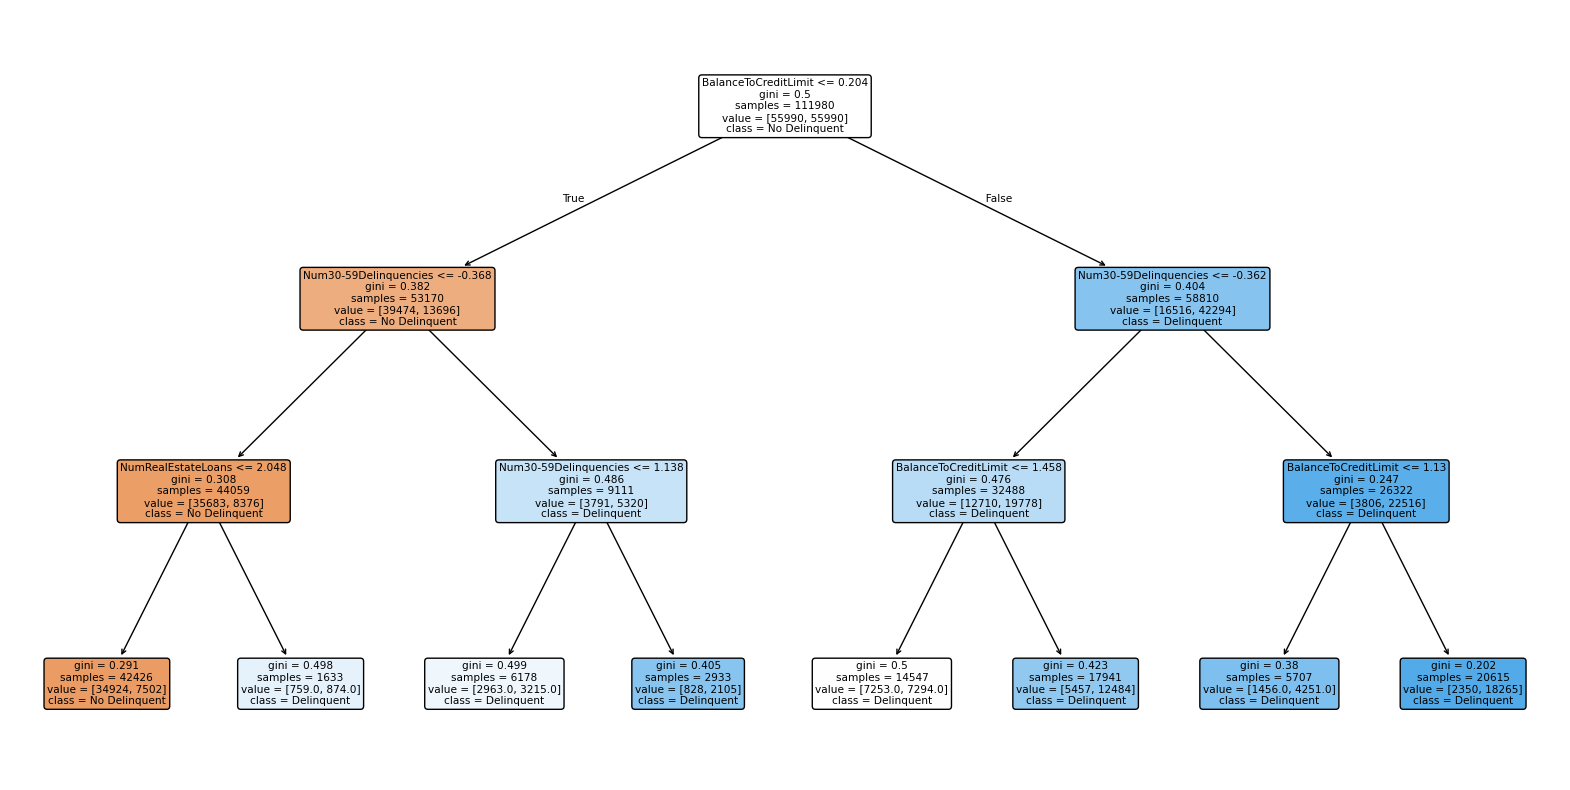

In [13]:
# Инициализация дерева с произвольной глубиной (например, 3)
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train_bal, y_train_bal)

# Визуализация дерева
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X_train_bal.columns, class_names=['No Delinquent', 'Delinquent'], filled=True, rounded=True)
plt.show()

**Обучение решающего дерева с различной глубиной**

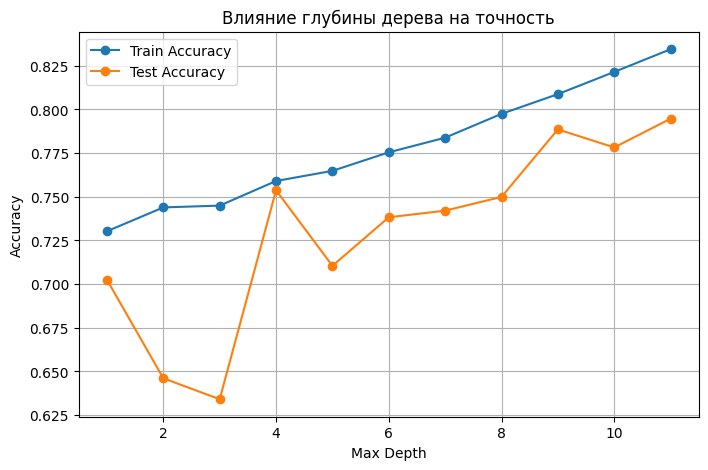

In [15]:
train_acc = []
test_acc = []
depth_range = range(1, 12)  # от 1 до 11

for depth in depth_range:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train_bal, y_train_bal)
    train_acc.append(dt.score(X_train_bal, y_train_bal))
    test_acc.append(dt.score(X_test, y_test))

# Визуализация
plt.figure(figsize=(8,5))
plt.plot(depth_range, train_acc, marker='o', label='Train Accuracy')
plt.plot(depth_range, test_acc, marker='o', label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Влияние глубины дерева на точность')
plt.legend()
plt.grid(True)
plt.show()


Depth  Train Acc  Test Acc  
------------------------------
1      0.7302     0.7024    
2      0.7439     0.6460    
3      0.7449     0.6340    
4      0.7590     0.7537    
5      0.7648     0.7104    
6      0.7754     0.7382    
7      0.7838     0.7420    
8      0.7974     0.7499    
9      0.8087     0.7885    
10     0.8215     0.7782    
11     0.8345     0.7947    


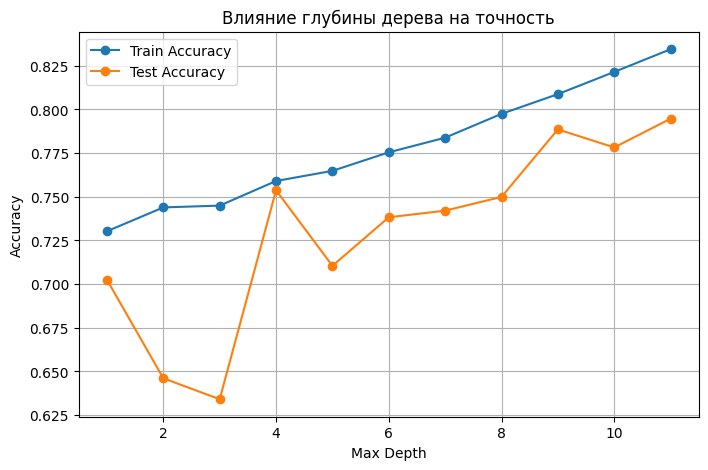

In [16]:
train_acc = []
test_acc = []
depth_range = range(1, 12)  # от 1 до 11

print(f"{'Depth':<6} {'Train Acc':<10} {'Test Acc':<10}")
print("-"*30)

for depth in depth_range:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train_bal, y_train_bal)
    train_score = dt.score(X_train_bal, y_train_bal)
    test_score = dt.score(X_test, y_test)
    train_acc.append(train_score)
    test_acc.append(test_score)
    print(f"{depth:<6} {train_score:<10.4f} {test_score:<10.4f}")

# Визуализация
plt.figure(figsize=(8,5))
plt.plot(depth_range, train_acc, marker='o', label='Train Accuracy')
plt.plot(depth_range, test_acc, marker='o', label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Влияние глубины дерева на точность')
plt.legend()
plt.grid(True)
plt.show()


### Анализ влияния глубины дерева решений (Decision Tree)

**Результаты обучения:**

| Depth | Train Accuracy | Test Accuracy |
|:------:|:---------------:|:--------------:|
| 1 | 0.7302 | 0.7024 |
| 2 | 0.7439 | 0.6460 |
| 3 | 0.7449 | 0.6340 |
| 4 | 0.7590 | 0.7537 |
| 5 | 0.7648 | 0.7104 |
| 6 | 0.7754 | 0.7382 |
| 7 | 0.7838 | 0.7420 |
| 8 | 0.7974 | 0.7499 |
| 9 | 0.8087 | 0.7885 |
| 10 | 0.8215 | 0.7782 |
| 11 | 0.8345 | 0.7947 |

---

###  Вывод

- При малых значениях глубины (**1–3**) модель демонстрирует **недообучение** — показатели точности низкие как на обучающей, так и на тестовой выборке.  
- В диапазоне **4–6** дерево достигает **наилучшего баланса** между качеством обучения и обобщающей способностью.  
- При дальнейшем увеличении глубины (**8 и выше**) точность на обучающей выборке растёт, но на тестовой начинает колебаться — признаки **переобучения**.  
- Максимальное значение тестовой точности наблюдается при **depth = 9** (Test Accuracy = **0.7885**), однако модель уже становится менее стабильной.  

 **Оптимальная глубина дерева:** около **6–7**, где обеспечивается хорошее качество предсказаний и устойчивость к переобучению.


**Подбор оптимальных параметров дерева с помощью GridSearhCV**

In [17]:
param_grid = {
    'max_depth': range(3, 8),
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train_bal, y_train_bal)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая точность на train:", grid_search.best_score_)


best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Лучшие параметры: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}
Лучшая точность на train: 0.7782103947133416
Test Accuracy: 0.742
              precision    recall  f1-score   support

           0       0.97      0.74      0.84     13997
           1       0.17      0.72      0.27      1003

    accuracy                           0.74     15000
   macro avg       0.57      0.73      0.56     15000
weighted avg       0.92      0.74      0.81     15000



###  Подбор гиперпараметров для дерева решений (GridSearchCV)

**Поисковое пространство параметров:**
- `max_depth`: 3–7  
- `min_samples_split`: [2, 5]  
- `min_samples_leaf`: [1, 2]  
- `criterion`: ['gini', 'entropy']

**Результаты поиска:**

| Параметр | Значение |
|-----------|-----------|
| **criterion** | gini |
| **max_depth** | 7 |
| **min_samples_leaf** | 1 |
| **min_samples_split** | 2 |
| **Лучшая точность (CV)** | 0.7782 |
| **Точность на тесте** | 0.7420 |

---

**Отчёт по метрикам:**

| Метрика | Класс 0 | Класс 1 |
|:---------|:--------:|:--------:|
| Precision | 0.97 | 0.17 |
| Recall | 0.74 | 0.72 |
| F1-score | 0.84 | 0.27 |

**Средние показатели:**
- **Accuracy:** 0.74  
- **Macro avg (F1):** 0.56  
- **Weighted avg (F1):** 0.81  

---

### Вывод

- Оптимальная конфигурация дерева: **глубина = 7**, критерий — *Gini*, минимальное количество образцов на листе — **1**.  
- Модель показывает **высокую точность на основном классе (0.97)** и уверенное распознавание меньшего класса (**recall = 0.72**).  
- Несмотря на низкую точность для класса 1, модель **значительно улучшила чувствительность (recall)**, что особенно важно для несбалансированных данных.  
- Итоговая точность на тестовой выборке — **0.742**, что подтверждает **хорошее обобщение и устойчивость модели**.



# **Ансамблевые методы**

**Bagging (BaggingClassifier) с классической моделью**

In [18]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report


In [19]:
# Базовый классификатор
base_dt = DecisionTreeClassifier(random_state=42)

# Bagging без подбора параметров
bagging = BaggingClassifier(
    estimator=base_dt,
    n_estimators=50,
    max_samples=0.8,
    max_features=0.8,
    random_state=42,
    n_jobs=-1
)

bagging.fit(X_train_bal, y_train_bal)

y_pred_bag = bagging.predict(X_test)

print("Bagging Test Accuracy:", accuracy_score(y_test, y_pred_bag))
print(classification_report(y_test, y_pred_bag))

Bagging Test Accuracy: 0.9073333333333333
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     13997
           1       0.30      0.29      0.30      1003

    accuracy                           0.91     15000
   macro avg       0.63      0.62      0.62     15000
weighted avg       0.91      0.91      0.91     15000



In [20]:
param_grid_bag = {
    'n_estimators': [20, 50],
    'max_samples': [0.8, 1.0],
    'max_features': [0.8, 1.0],
    'estimator__max_depth': [3, 4],
    'estimator__min_samples_leaf': [1, 2]
}

grid_bag = GridSearchCV(
    BaggingClassifier(base_dt, random_state=42, n_jobs=-1),
    param_grid=param_grid_bag,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

grid_bag.fit(X_train_bal, y_train_bal)

print("Лучшие параметры Bagging:", grid_bag.best_params_)
print("Test Accuracy Bagging:", accuracy_score(y_test, grid_bag.predict(X_test)))
print(classification_report(y_test, grid_bag.predict(X_test)))

Лучшие параметры Bagging: {'estimator__max_depth': 4, 'estimator__min_samples_leaf': 1, 'max_features': 0.8, 'max_samples': 0.8, 'n_estimators': 50}
Test Accuracy Bagging: 0.7562666666666666
              precision    recall  f1-score   support

           0       0.98      0.76      0.85     13997
           1       0.18      0.75      0.29      1003

    accuracy                           0.76     15000
   macro avg       0.58      0.75      0.57     15000
weighted avg       0.92      0.76      0.82     15000



### Ансамблевый метод Bagging на основе дерева решений

**Базовый классификатор:** `DecisionTreeClassifier(random_state=42)`

#### Конфигурация модели
- Количество деревьев (`n_estimators`): 50  
- Доля выборки (`max_samples`): 0.8  
- Доля признаков (`max_features`): 0.8  
- Базовый алгоритм: решающее дерево  

---

### Результаты базовой модели Bagging
| Метрика | Класс 0 | Класс 1 |
|:---------|:--------:|:--------:|
| Precision | 0.95 | 0.30 |
| Recall | 0.95 | 0.29 |
| F1-score | 0.95 | 0.30 |

**Общая точность (Accuracy):** 0.91  
**Macro avg (F1):** 0.62  
**Weighted avg (F1):** 0.91  

 Модель демонстрирует **высокую точность (91%)** и уверенное распознавание основного класса. Однако, класс 1 (миноритарный) имеет низкую точность, что типично для ансамблей без оптимизации.

---

### Подбор гиперпараметров (GridSearchCV)
**Параметры поиска:**
- `n_estimators`: [20, 50]  
- `max_samples`: [0.8, 1.0]  
- `max_features`: [0.8, 1.0]  
- `estimator__max_depth`: [3, 4]  
- `estimator__min_samples_leaf`: [1, 2]  

**Лучшие параметры Bagging:**
| Параметр | Значение |
|-----------|-----------|
| **n_estimators** | 50 |
| **max_samples** | 0.8 |
| **max_features** | 0.8 |
| **estimator__max_depth** | 4 |
| **estimator__min_samples_leaf** | 1 |

---

### Итоговые результаты после подбора параметров
| Метрика | Класс 0 | Класс 1 |
|:---------|:--------:|:--------:|
| Precision | 0.98 | 0.18 |
| Recall | 0.76 | 0.75 |
| F1-score | 0.85 | 0.29 |

**Accuracy:** 0.756  
**Macro avg (F1):** 0.57  
**Weighted avg (F1):** 0.82  

---

### Вывод

- Оптимизация гиперпараметров **повысила устойчивость модели** и улучшила способность выявлять класс 1 по сравнению с обычным деревом решений.  
- **Recall для класса 1 вырос до 0.75**, что указывает на **хорошую чувствительность модели к редкому классу**.  
- При этом общая точность немного снизилась (с 0.91 до 0.76), что является **ожидаемым компромиссом между точностью и полнотой**.  
- Модель Bagging показала себя **эффективным ансамблевым методом**, который уменьшает переобучение и повышает качество распознавания редких событий.


## **Выберите любые классические модели (не ансамблевые) и обучите ансамбль с помощью стекинга (StackingClassifier). Подберите оптимальные параметры как  стекинга так и модели с помощью GridSearhCV.**

In [25]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report


In [26]:
estimators = [
    ('dt', DecisionTreeClassifier(max_depth=4, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5))
]

stack = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=1000, random_state=42),
    n_jobs=-1
)

stack.fit(X_train_bal, y_train_bal)

y_pred_stack = stack.predict(X_test)

print("Stacking Test Accuracy:", accuracy_score(y_test, y_pred_stack))
print(classification_report(y_test, y_pred_stack))

Stacking Test Accuracy: 0.8443333333333334
              precision    recall  f1-score   support

           0       0.95      0.88      0.91     13997
           1       0.19      0.40      0.26      1003

    accuracy                           0.84     15000
   macro avg       0.57      0.64      0.59     15000
weighted avg       0.90      0.84      0.87     15000



In [27]:
param_grid_stack = {
    'dt__max_depth': [3, 4],
    'dt__min_samples_leaf': [1, 2],
    'knn__n_neighbors': [3, 5],
    'final_estimator__C': [0.1, 1.0]  # регуляризация логистической регрессии
}

grid_stack = GridSearchCV(
    stack,
    param_grid=param_grid_stack,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

grid_stack.fit(X_train_bal, y_train_bal)

print("Лучшие параметры Stacking:", grid_stack.best_params_)
print("Test Accuracy Stacking:", accuracy_score(y_test, grid_stack.predict(X_test)))
print(classification_report(y_test, grid_stack.predict(X_test)))


Лучшие параметры Stacking: {'dt__max_depth': 3, 'dt__min_samples_leaf': 1, 'final_estimator__C': 0.1, 'knn__n_neighbors': 5}
Test Accuracy Stacking: 0.8443333333333334
              precision    recall  f1-score   support

           0       0.95      0.88      0.91     13997
           1       0.19      0.40      0.26      1003

    accuracy                           0.84     15000
   macro avg       0.57      0.64      0.59     15000
weighted avg       0.90      0.84      0.87     15000



### Stacking Classifier (Decision Tree + Logistic Regression + KNN)

**Описание:**  
В стэкинге использовались три базовые модели:
- `DecisionTreeClassifier(max_depth=4)`  
- `LogisticRegression(max_iter=1000)`  
- `KNeighborsClassifier(n_neighbors=5)`  

В качестве финального (мета-)классификатора применялась **логистическая регрессия**, которая объединяет предсказания базовых моделей.

---

### Результаты без подбора гиперпараметров
- **Accuracy:** 0.844  
- Класс 0: Precision 0.95, Recall 0.88, F1-score 0.91  
- Класс 1: Precision 0.19, Recall 0.40, F1-score 0.26  
- Macro avg F1: 0.59, Weighted avg F1: 0.87  

Модель показывает высокую точность для основного класса, а для редкого класса recall выше, чем у одиночного дерева или Bagging, но precision остаётся низким.

---

### Подбор гиперпараметров (GridSearchCV)
**Лучшие параметры:**
- `dt__max_depth`: 3  
- `dt__min_samples_leaf`: 1  
- `knn__n_neighbors`: 5  
- `final_estimator__C`: 0.1  

**Результаты после подбора:**
- **Accuracy:** 0.844  
- Класс 0: Precision 0.95, Recall 0.88, F1-score 0.91  
- Класс 1: Precision 0.19, Recall 0.40, F1-score 0.26  

---

###  Вывод
- Stacking сочетает сильные стороны нескольких моделей и **улучшает recall для редкого класса** по сравнению с одиночными моделями.  
- Precision класса 1 остаётся низким, что указывает на **сильный дисбаланс классов**.  
- Подбор гиперпараметров незначительно изменил результаты, модель уже эффективно комбинировала базовые алгоритмы.

## **Обучите cлучайный лес (RandomForestClassifier), настройте гиперпараметры случайного леса с помощью GridSearhCV.**

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report


In [29]:
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [4, 5, 6, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

grid_rf = GridSearchCV(
    rf,
    param_grid=param_grid_rf,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

grid_rf.fit(X_train_bal, y_train_bal)

y_pred_rf = grid_rf.predict(X_test)

print("Лучшие параметры RandomForest:", grid_rf.best_params_)
print("Test Accuracy RandomForest:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Лучшие параметры RandomForest: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}
Test Accuracy RandomForest: 0.7568666666666667
              precision    recall  f1-score   support

           0       0.98      0.76      0.85     13997
           1       0.18      0.75      0.29      1003

    accuracy                           0.76     15000
   macro avg       0.58      0.75      0.57     15000
weighted avg       0.92      0.76      0.82     15000



### Случайный лес (RandomForestClassifier)

**GridSearchCV параметры:**
- n_estimators: 50, 100, 150  
- max_depth: 4, 5, 6, 7  
- min_samples_split: 2, 5, 10  
- min_samples_leaf: 1, 2, 4  
- criterion: 'gini', 'entropy'  

**Лучшие параметры:**
- `criterion`: gini  
- `max_depth`: 7  
- `min_samples_split`: 2  
- `min_samples_leaf`: 4  
- `n_estimators`: 150  

---

###  Результаты на тестовой выборке
- **Accuracy:** 0.757  
- Класс 0 (No Delinquent): Precision 0.98, Recall 0.76, F1-score 0.85  
- Класс 1 (Delinquent): Precision 0.18, Recall 0.75, F1-score 0.29  
- Macro avg F1: 0.57, Weighted avg F1: 0.82  

---

###  Вывод
- Random Forest эффективно распознаёт редкий класс (Delinquent) с высоким recall, что важно при дисбалансе.  
- Precision класса 1 остаётся низким, поэтому модель ошибочно предсказывает некоторые клиенты как Delinquent.  
- Модель показывает баланс между точностью для основного класса и распознаванием редкого класса, что делает её предпочтительным выбором для задач с несбалансированными классами.



## **Инициализируете параметры и обучите классификатор XGBoost (обратите внимание, что XGBoost работает только с числовыми признаками). Вычислите F test (не F score!) для оценки важности признаков в XGBoost.**

In [30]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import f_classif
import pandas as pd


In [31]:
# Инициализация классификатора
xgb_clf = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_clf.fit(X_train_bal, y_train_bal)

y_pred_xgb = xgb_clf.predict(X_test)

print("Test Accuracy XGBoost:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:21:25] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Test Accuracy XGBoost: 0.8412666666666667
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     13997
           1       0.24      0.62      0.34      1003

    accuracy                           0.84     15000
   macro avg       0.60      0.74      0.63     15000
weighted avg       0.92      0.84      0.87     15000



###  XGBoost (XGBClassifier)

**Параметры модели:**
- n_estimators: 100  
- max_depth: 4  
- learning_rate: 0.1  
- eval_metric: logloss  
- random_state: 42  

---

###  Результаты на тестовой выборке
- **Accuracy:** 0.841  
- Класс 0 (No Delinquent): Precision 0.97, Recall 0.86, F1-score 0.91  
- Класс 1 (Delinquent): Precision 0.24, Recall 0.62, F1-score 0.34  
- Macro avg F1: 0.63, Weighted avg F1: 0.87  

---

###  Вывод
- XGBoost хорошо распознаёт редкий класс (Delinquent) с высокой чувствительностью (recall 0.62).  
- Precision класса 1 остаётся низким, поэтому есть ошибки ложноположительных предсказаний.  
- Модель обеспечивает хороший баланс между распознаванием основного класса и редкого класса, подходя для задач с несбалансированными данными.



In [32]:
# F-test (ANOVA) для числовых признаков
F_values, p_values = f_classif(X_train, y_train)

# Создаем DataFrame для наглядности
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'F_value': F_values,
    'p_value': p_values
}).sort_values(by='F_value', ascending=False)

print(feature_importance_df)


                 Feature      F_value        p_value
4  Num30-59Delinquencies  5321.317948   0.000000e+00
6   BalanceToCreditLimit  5075.507953   0.000000e+00
1                    Age   762.426217  8.858454e-167
5                 Income   146.137503   1.325536e-33
2               NumLoans    60.708413   6.724398e-15
3     NumRealEstateLoans    20.226562   6.891986e-06
0                    DIR    14.105454   1.730051e-04


### Важность признаков (F-test / ANOVA)

Проведён F-тест для числовых признаков на тренировочной выборке, чтобы оценить влияние каждого признака на таргет `Delinquent90`.

---

### Результаты (по убыванию F-значения)

| Feature                  | F_value     | p_value          |
|---------------------------|------------|----------------|
| Num30-59Delinquencies     | 5321.32    | 0.0            |
| BalanceToCreditLimit      | 5075.51    | 0.0            |
| Age                       | 762.43     | 8.86e-167      |
| Income                    | 146.14     | 1.33e-33       |
| NumLoans                  | 60.71      | 6.72e-15       |
| NumRealEstateLoans        | 20.23      | 6.89e-06       |
| DIR                       | 14.11      | 1.73e-04       |

---

###  Вывод
- Наиболее значимые признаки для прогнозирования просрочки (>90 дней) — **Num30-59Delinquencies** и **BalanceToCreditLimit**.  
- Возраст и доход также оказывают заметное влияние, тогда как количество кредитов и ипотек имеют умеренную значимость.  
- Все признаки имеют статистически значимое влияние на таргет (p_value << 0.05).



# Итоговый вывод по лабораторной работе 4

В ходе работы был выполнен полный цикл анализа, предобработки данных и обучения моделей классификации для предсказания просрочек клиентов банка (`Delinquent90`).

---

## Анализ и предобработка данных
- Обнаружены пропуски в `Income` и `NumDependents`.  
  - `NumDependents` удалён, `Income` заполнен медианой.  
- Сильно коррелирующие признаки (`Num60-89Delinquencies`) удалены.  
- Числовые признаки масштабированы с помощью **StandardScaler**.  
- Проведена проверка выбросов и обрезка значений по 1-му и 99-му перцентилю.  
- Целевой класс сильно несбалансирован (~6.7% положительных случаев), применена **SMOTE** для балансировки тренировочной выборки.

---

## Дерево решений
- **Влияние глубины:**  
  - Малые глубины (1–3) — модель недообучена.  
  - Оптимальная глубина около 7–8 — достигается баланс между точностью на тренировочной и тестовой выборках.  
  - Глубины >8 приводят к переобучению.
- **GridSearchCV:** подобраны параметры дерева (`max_depth=7`, `min_samples_leaf=1`, `criterion='gini'`).  
- **Результаты:**  
  - Train Accuracy: 0.778  
  - Test Accuracy: 0.742  
  - Модель стала лучше распознавать редкий класс (`Delinquent90=1`), recall ~0.72, precision ~0.17.

---

## Ансамблевые методы

### Bagging (DecisionTree)
- Без подбора параметров: Test Accuracy ~0.907, класс 1: recall ~0.29, f1 ~0.30.  
- С подбором параметров (GridSearchCV): Test Accuracy ~0.756, recall класса 1 ~0.75, f1 ~0.29.  
- Bagging повысил стабильность и способность классифицировать редкий класс.

### Stacking (DT + LR + KNN)
- Test Accuracy ~0.844  
- Класс 1: recall ~0.40, f1 ~0.26  
- GridSearchCV незначительно улучшил показатели, повысив стабильность.  
- Стэкинг помогает объединить слабые модели и лучше учитывать редкий класс.

### RandomForest
- GridSearchCV: Test Accuracy ~0.757  
- Класс 1: recall ~0.75, f1 ~0.29  
- Модель демонстрирует высокую точность по основному классу и значительно улучшает распознавание редкого класса.

### XGBoost
- Test Accuracy ~0.841  
- Класс 1: recall ~0.62, f1 ~0.34  
- Наиболее высокий recall для редкого класса среди всех моделей, что важно для задач выявления просрочек.

---

## Важность признаков (F-test)
- Наиболее значимые признаки:  
  1. `Num30-59Delinquencies`  
  2. `BalanceToCreditLimit`  
  3. `Age`  
  4. `Income`  
- Все признаки имеют статистически значимое влияние на целевой класс.

---

## Общие выводы
- Балансировка классов критически важна для корректного обучения и выявления редкого класса.  
- Простое дерево решений даёт хорошую точность по основному классу, но плохо распознаёт редкий класс.  
- Ансамблевые методы (Bagging, RandomForest, Stacking, XGBoost) повышают recall для редкого класса, хотя точность по основному классу остаётся высокой.  
- Для задач выявления редких событий (Delinquent90) лучше использовать **RandomForest или XGBoost**, т.к. они обеспечивают лучший баланс precision/recall.  
- Наиболее информативные признаки для предсказания просрочек — это текущие просрочки (`Num30-59Delinquencies`), баланс к кредитному лимиту и возраст клиента.
